<a href="https://colab.research.google.com/github/glamacles/nn_sliding_law/blob/kevin-NN/turner_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
path = r"/content/drive/My Drive/glamacles/"

Mounted at /content/drive


In [ ]:
# get the sliding law and data from github
! git clone https://github.com/glamacles/nn_sliding_law

Cloning into 'nn_sliding_law'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 104 (delta 19), reused 99 (delta 17), pack-reused 0
Receiving objects: 100% (104/104), 4.09 MiB | 13.91 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
# import firedrake
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2024-06-22 16:08:14--  https://fem-on-colab.github.io/releases/firedrake-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4581 (4.5K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.47K  --.-KB/s    in 0s      

2024-06-22 16:08:14 (41.3 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4581/4581]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/9be49f2/rele

In [ ]:
cd nn_sliding_law/examples/turner/inference

/content/nn_sliding_law/examples/turner/inference


In [ ]:
run nn_law

  v_avg = np.nanmean(velocities,axis=0)

  warn(



0 0.004465970894620247 0.7054779529571533
1 0.011149587241320287 0.24946355819702148
2 0.03235179563608277 0.22131896018981934
3 0.045609870655273534 0.19611454010009766
4 0.050253974352457736 0.21170282363891602
5 0.052756987034599204 0.18161964416503906
6 0.05359060896970588 0.1751539707183838
7 0.052257325154749915 0.17790484428405762
8 0.04871085433356698 0.1686234474182129
9 0.04363107814556677 0.17181158065795898
10 0.037955243543048856 0.18819832801818848
11 0.032293800335886 0.17561125755310059
12 0.027007751974357563 0.17238616943359375
13 0.02228465418887504 0.1676027774810791
14 0.01819421692558043 0.16922616958618164
15 0.01473189221608967 0.1784954071044922
16 0.01185105467930253 0.1852109432220459
17 0.009485031887948026 0.17256593704223633
18 0.007561084211053115 0.16947722434997559
19 0.006008568623058319 0.16666388511657715
20 0.004763186368857086 0.1680283546447754
21 0.003768759409683742 0.17669415473937988
22 0.0029775451730876257 0.17647933959960938
23 0.0023497564

  warn(



26 0.001149660292410426 0.1671006679534912
27 0.000905054828263474 0.16832566261291504
11.618489464867553


<Figure size 640x480 with 0 Axes>

Building the neural network.

In [ ]:
# import nn dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# define the class, layers, and forward pass
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(4, 32),     # number of features, number of desired hidden layers
      nn.ReLU(),
      nn.Linear(32, 1)      # number of hidden layers, number of outputs
    )


  def forward(self, x):   # x = input
    '''Forward pass'''
    return self.layers(x)

In [ ]:
# Initialize the MLP and run
mlp = MLP()   # initialize
log_beta = mlp(features) # feed the model with the features
beta = torch.exp(log_beta)  # take the exp of the NN output to ensure positivity
beta = beta.squeeze()

In [ ]:
# call the FE function with the NN computed beta
Ubar,Udef,H0 = fm.apply(H0,B,beta,adot,Ubar,Udef,model,adjoint,0.0,1e-5,solver_args)

0 0.22567097218261606 0.15775799751281738
1 0.1188677285428831 0.1786177158355713
2 0.06420111607956962 0.17967510223388672
3 0.0356700366322107 0.17386841773986816
4 0.020416013717743216 0.16799163818359375
5 0.012040751358401783 0.17979788780212402
6 0.007310712414660539 0.16690611839294434
7 0.004560848274736198 0.16721749305725098
8 0.002915624485003848 0.17133474349975586
9 0.0019040224431084857 0.1717066764831543
10 0.0012662519894342944 0.17167901992797852
11 0.0008551598197509697 0.17810702323913574


In [ ]:
# loss function
L = um.apply(Ubar,Udef,v_avg,v_tau,v_mask,ui)*750
print(L.item())

244.74799123212784


In [ ]:
# propogate back the loss
L.backward()

In [ ]:
# inspect the gradients from the NN
grads = [p.grad for p in mlp.parameters()]
grads

[tensor([[ 1.9816e+00,  1.1245e-01,  3.0870e+01,  4.1370e+01],
         [-6.4472e+00, -3.6543e-01, -1.0055e+02, -1.3475e+02],
         [-1.0965e-01, -4.3828e-02, -1.5983e+00, -6.8639e+00],
         [-9.1840e+00, -5.2113e-01, -1.4307e+02, -1.9173e+02],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [-8.2314e+00, -4.6712e-01, -1.2839e+02, -1.7205e+02],
         [ 8.8005e+00,  4.9937e-01,  1.3709e+02,  1.8372e+02],
         [-4.3327e-01, -1.7559e-01, -6.8725e+00, -2.6004e+01],
         [-6.8027e-01, -3.8763e-02, -1.0623e+01, -1.4261e+01],
         [ 2.4496e-02,  5.9178e-04,  4.5521e-01,  4.0468e-01],
         [ 8.9835e+00,  5.0919e-01,  1.4010e+02,  1.8776e+02],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [-5.6608e+00, -1.6232e-01, -8.8627e+01, -9.9751e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 8.3881e-01,  4.6244e-02,  1.3004e+01,  1.7418e+01],
         [-8.9041e+00, -5.0468e-01, -1.3887e+02, -1.861

Great. Now, we can loop this process, using the gradient in an optimizer to reduce our loss.

In [83]:
U_file = df.File(f'{path}/nn/U_s.pvd')
loss_list = []
learning_rate = 0.01
optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

for i in range(100):            # range= number of iterations
  log_beta = mlp(features)    # feed features in the initialized NN model
  beta = torch.exp(log_beta)  # take the exp of the NN output to ensure positivity
  beta = beta.squeeze()       # squeeze output to single dimension
  Ubar,Udef,H = fm.apply(H0,B,beta,adot,Ubar.detach(),Udef.detach(),model,adjoint,0.0,1e-5,solver_args)
  L = um.apply(Ubar,Udef,v_avg,v_tau,v_mask,ui)*750
  print(str(i)+": "+str(L.item()))
  loss_list.append(L.item())
  if i % 10 == 0:
    model.project_surface_velocity()
    U_file.write(model.U_s,time=i)

  L.backward()
  optimizer.step()
  optimizer.zero_grad()

  warn(



0 0.0014959973480382222 0.14308905601501465
1 0.0008476993351561185 0.17824649810791016
0: 109.68636333859313
0 0.05476925971295452 0.1546649932861328
1 0.03536089787788102 0.17916345596313477
2 0.022379969302989078 0.18542957305908203
3 0.01404562822354348 0.17300200462341309
4 0.008945970020108718 0.17476415634155273
5 0.005781568288798278 0.17711639404296875
6 0.003740671074769636 0.1844339370727539
7 0.0024258495075491215 0.17230629920959473
8 0.001577754252968272 0.17704463005065918
9 0.001029362680692869 0.17122220993041992
10 0.0006736814665106727 0.17726945877075195
1: 138.84991376521478
0 0.06632307563762482 0.2355194091796875
1 0.03506005644720851 0.25136780738830566
2 0.0189236163601285 0.2450270652770996
3 0.01084131663947889 0.2603785991668701
4 0.006428335894958739 0.25162386894226074
5 0.0038814760144602334 0.22397494316101074
6 0.002379580269053938 0.2250230312347412
7 0.0014773375093478786 0.22579526901245117
8 0.0009268100107353849 0.22137904167175293
2: 109.351607362

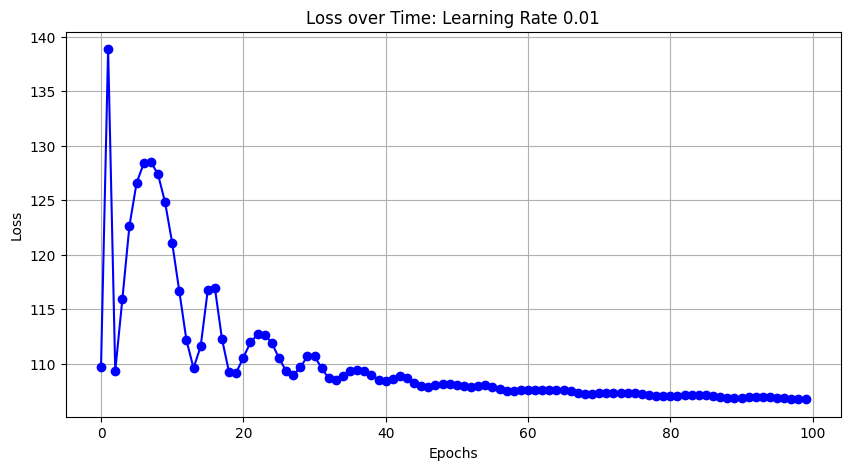

In [84]:
import matplotlib.pyplot as plt

# Plotting the loss list
plt.figure(figsize=(10, 5))
plt.plot(loss_list, marker='o', linestyle='-', color='b')
plt.title('Loss over Time: Learning Rate '+ str(learning_rate))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [ ]:
mlp = MLP()   # initialize
loss_list = []
learning_rate = 0.005
optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

for i in range(200):            # range= number of iterations
  log_beta = mlp(features)    # feed features in the initialized NN model
  beta = torch.exp(log_beta)  # take the exp of the NN output to ensure positivity
  beta = beta.squeeze()       # squeeze output to single dimension
  Ubar,Udef,H = fm.apply(H0,B,beta,adot,Ubar.detach(),Udef.detach(),model,adjoint,0.0,1e-5,solver_args)
  L = um.apply(Ubar,Udef,v_avg,v_tau,v_mask,ui)*750
  print(str(i)+": "+str(L.item()))
  loss_list.append(L.item())
  L.backward()
  optimizer.step()
  optimizer.zero_grad()

0 0.16266430936164952 0.17803311347961426
1 0.1118178699425497 0.2204275131225586
2 0.07474367903157864 0.21330952644348145
3 0.06265725308777886 0.19110321998596191
4 0.04938296316909713 0.21019792556762695
5 0.03664064803652031 0.1956639289855957
6 0.02622458763031768 0.20035290718078613
7 0.01837175298012725 0.19539999961853027
8 0.012708816066734269 0.21009612083435059
9 0.008727948015468695 0.18881916999816895
10 0.005970880494166636 0.19103264808654785
11 0.004077745751153633 0.19288873672485352
12 0.0027839660283953682 0.19979214668273926
13 0.0019030365490876888 0.18730735778808594
14 0.0013998081441029264 0.1950540542602539
15 0.0010309790035237798 0.18864059448242188
16 0.0007604865982829834 0.19386625289916992
0: 1173.9953622743255
0 0.06213644981870528 0.1504802703857422
1 0.0328464177968216 0.19539856910705566
2 0.01761846623433061 0.18066191673278809
3 0.009837567993364854 0.18228483200073242
4 0.005877279462111501 0.18254661560058594
5 0.0037001197763515126 0.20340704917

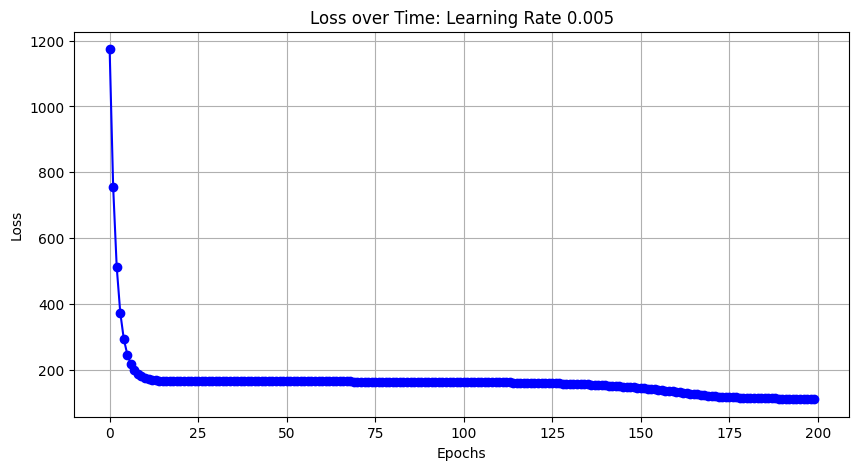

In [ ]:
# Plotting the loss list
plt.figure(figsize=(10, 5))
plt.plot(loss_list, marker='o', linestyle='-', color='b')
plt.title('Loss over Time: Learning Rate '+ str(learning_rate))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
